In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string as s
import re

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# Loading the Dataset

In [ ]:
#1 means it is a clickbait and 0 means it is not a clickbait 
cb_data= pd.read_csv('train.csv')
cb_data.head(10)

,id,title,text,label
0,0,China and Economic Reform: Xi Jinping’s Track ...,Economists generally agree: China must overhau...,news
1,1,Trade to Be a Big Topic in Theresa May’s U.S. ...,LONDON—British Prime Minister Theresa May said...,news
2,2,"The Top Beaches In The World, According To Nat...",Beaches come in all sorts of shapes and sizes ...,clickbait
3,3,Sheriff’s Report Provides New Details on Tamir...,"A timeline of what happened after Tamir Rice, ...",clickbait
4,4,Surgeon claiming he will transplant volunteer'...,An Italian neurosurgeon who has claimed for mo...,news
5,5,This Is How Differently Priced Spanx Can Actua...,Spanx does not do the thing I thought it did. ...,news
6,6,Samantha Bee and Jane Pauley Are Breaking the ...,"“Jane Pauley! You’re all in leather,” said Sam...",news
7,7,Krauthammer: Syria Strike 'Total Contradiction...,Charles Krauthammer called President Trump's 5...,news
8,8,Rust Belt voters made Trump president. Now the...,The United States is making more things than e...,news
9,9,"As Illegal Outpost Cleared, Israeli PM Netanya...",As Jewish settlers and protesters were removed...,news


## Data Visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


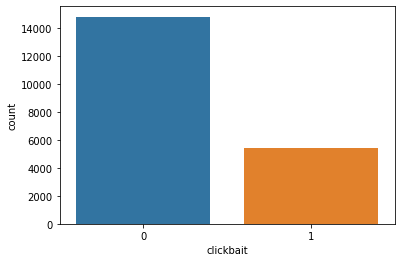

In [ ]:
sns.countplot(cb_data.clickbait)

In [ ]:
"""caq=0
canq=0
ncaq=0
ncanq=0
for i in range(len(cb_data)):
  text = cb_data.iloc[i,0]
  if "!" in text:
    x = cb_data.iloc[i,1]
    if(x==1):
      caq+=1
    elif(x==0):
      ncaq+=1
  else:
    y = cb_data.iloc[i,1]
    if(y==1):
      canq+=1
    elif(y==0):
      ncanq+=1
print(caq, canq, ncaq, ncanq)"""

'caq=0\ncanq=0\nncaq=0\nncanq=0\nfor i in range(len(cb_data)):\n  text = cb_data.iloc[i,0]\n  if "!" in text:\n    x = cb_data.iloc[i,1]\n    if(x==1):\n      caq+=1\n    elif(x==0):\n      ncaq+=1\n  else:\n    y = cb_data.iloc[i,1]\n    if(y==1):\n      canq+=1\n    elif(y==0):\n      ncanq+=1\nprint(caq, canq, ncaq, ncanq)'

In [ ]:
"""can=0
cann=0
ncan=0
ncann=0
for i in range(len(cb_data)):
  text = cb_data.iloc[i,0]
  if(text[0].isdigit()):
    x = cb_data.iloc[i,1]
    if(x==1):
      can+=1
    elif(x==0):
      ncan+=1
  else:
    y = cb_data.iloc[i,1]
    if(y==1):
      cann+=1
    elif(y==0):
      ncann+=1
print(can, cann, ncan, ncann)
numpresent = [can, ncan]
numnotpresent = [cann, ncann]
x = ['clickbaits', 'non-clickbaits']
width = 0.3
x_new = np.arange(len(x))
plt.bar(x_new,numpresent, width=width, label='line1')
plt.bar(x_new + width,numnotpresent, width=width, label = 'line2')
plt.legend(['Starting with number','Not starting with number'])
plt.xticks(ticks=x_new, labels=x)"""


"can=0\ncann=0\nncan=0\nncann=0\nfor i in range(len(cb_data)):\n  text = cb_data.iloc[i,0]\n  if(text[0].isdigit()):\n    x = cb_data.iloc[i,1]\n    if(x==1):\n      can+=1\n    elif(x==0):\n      ncan+=1\n  else:\n    y = cb_data.iloc[i,1]\n    if(y==1):\n      cann+=1\n    elif(y==0):\n      ncann+=1\nprint(can, cann, ncan, ncann)\nnumpresent = [can, ncan]\nnumnotpresent = [cann, ncann]\nx = ['clickbaits', 'non-clickbaits']\nwidth = 0.3\nx_new = np.arange(len(x))\nplt.bar(x_new,numpresent, width=width, label='line1')\nplt.bar(x_new + width,numnotpresent, width=width, label = 'line2')\nplt.legend(['Starting with number','Not starting with number'])\nplt.xticks(ticks=x_new, labels=x)"

# Splitting into Train and Test sets

The dataset is splitted into training and testing sets. The percentage of training data is 75% and testing data is 25%.

In [ ]:
x=cb_data.title
y=cb_data.clickbait
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=2)

# Analyzing Train and Test Data

In [ ]:
print("No. of elements in training set")
print(train_x.size)
print("No. of elements in testing set")
print(test_x.size)

No. of elements in training set
15181
No. of elements in testing set
5061


In [ ]:
train_x.head(10)

13985    Comment on Former CIA Officer: “Every Single T...
3128     Payday Loans’ Debt Spiral to Be Curtailed - Th...
12658                        7 reasons I'll vote for Trump
15755    ’Terminate the B*tch with Extreme Prejudice’: ...
14285    Pope Tells Marchers: Protect Life‘from the Mom...
12928    Melania Trump Is First Catholic to Live in Whi...
17040                              How to be late for work
3236     Palestinian rivals, Mideast regional powers gr...
5041     ’Destiny 2’ - Official Gameplay Reveal Trailer...
7274               Letter for Mr Smith - part 2 The Main -
Name: title, dtype: object

In [ ]:
train_y.head(10)

13985    0
3128     0
12658    1
15755    0
14285    1
12928    1
17040    1
3236     0
5041     1
7274     1
Name: clickbait, dtype: int64

In [ ]:
test_x.head(10)

18343    Torn Over Donald Trump and Cut Off by Culture ...
17124    Dem Rep Gabbard: I’m ’Doing My Homework’ on th...
11186    Dave Chappelle on Trump, Cosby and His Netflix...
10076    Bombing at Bangladesh’s Largest Eid Gathering ...
13728    A Dinosaur Cousin’s Crocodile Ankles Surprise ...
8512       The truth about Zika: It's a grand medical hoax
18994    Report: Barron Trump ’Panicked’ after Seeing K...
5818        Не дадим российским роботам нападать на людей!
8985     Aleppo Bombs Leave Quarter Million ‘Living in ...
13712    Nunes Stepping Aside Temporarily from Russia P...
Name: title, dtype: object

In [ ]:
test_y.head()
test_y.value_counts()

0    3689
1    1372
Name: clickbait, dtype: int64

# Preprossing

## Tokenization of Data

The data is tokenized i.e. split into tokens which are the smallest or minimal meaningful units. The data is split into words.

In [ ]:
def clickbait_tokenization(text):
    temp=text.split()
    return temp
train_x=train_x.apply(clickbait_tokenization)
test_x=test_x.apply(clickbait_tokenization)

## Converting to lowercase

The data is converted into lowercase to avoid ambiguity between same words in different cases like 'NLP', 'nlp' or 'Nlp'. 

In [ ]:
def clickbait_lowercasing(temp):
    new_lst=[]
    for i in temp:
        i=i.lower()
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(clickbait_lowercasing)
test_x=test_x.apply(clickbait_lowercasing)  

NameError: ignored

## Removing punctuation

The punctuations are removed to increase the efficiency of the model. They are irrelevant because they provide no added information.

In [ ]:
def clickbait_remove_punctuations(temp):
    new_lst=[]
    for i in temp:
        for j in s.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(clickbait_remove_punctuations)
test_x=test_x.apply(clickbait_remove_punctuations)  

## Removing Numbers

In [ ]:
def clickbait_remove_numbers(temp):
    nodig_lst=[]
    new_lst=[]
    for i in temp:
        for j in s.digits:    
            i=i.replace(j,'')
        nodig_lst.append(i)
    for i in nodig_lst:
        if i!='':
            new_lst.append(i)
    return new_lst
train_x=train_x.apply(clickbait_remove_numbers)
test_x=test_x.apply(clickbait_remove_numbers)

## Removing Stopwords

In [ ]:
print("All stopwords of English language ")
", ".join(stopwords.words('english'))

All stopwords of English language 


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
def clickbait_remove_stopwords(temp):
    stop=stopwords.words('english')
    new_lst=[]
    for i in temp:
        if i not in stop:
            new_lst.append(i)
    return new_lst

train_x=train_x.apply(clickbait_remove_stopwords)
test_x=test_x.apply(clickbait_remove_stopwords)  

## Removing extra spaces

In [ ]:
def clickbait_remove_spaces(temp):
    new_lst=[]
    for i in temp:
        i=i.strip()
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(clickbait_remove_spaces)
test_x=test_x.apply(clickbait_remove_spaces)

# Analyzing data after preprocessing

After preprocessing the data i.e. after removing punctuation, stopwords, spaces and numbers.

In [ ]:
train_x.head()

13985    [comment, former, cia, officer, “every, single...
3128     [payday, loans’, debt, spiral, curtailed, new,...
12658                          [reasons, ill, vote, trump]
15755    [’terminate, btch, extreme, prejudice’, paramo...
14285    [pope, tells, marchers, protect, life‘from, mo...
Name: title, dtype: object

In [ ]:
test_x.head()

18343    [torn, donald, trump, cut, culture, wars, evan...
17124    [dem, rep, gabbard, i’m, ’doing, homework’, im...
11186    [dave, chappelle, trump, cosby, netflix, deal,...
10076    [bombing, bangladesh’s, largest, eid, gatherin...
13728    [dinosaur, cousin’s, crocodile, ankles, surpri...
Name: title, dtype: object

# Lemmatization

Lemmatization in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form. It involves the morphological analysis of words.

In lemmatization we find the root word or base form of the word rather than just clipping some characters from the end e.g. *is, are, am* are all converted to its base form *be* in Lemmatization

Here lemmatization is done using NLTK library.

In [ ]:
lemmatizer=nltk.stem.WordNetLemmatizer()
def clickbait_lemmatzation(temp):
    new_lst=[]
    for i in temp:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(clickbait_lemmatzation)
test_x=test_x.apply(clickbait_lemmatzation)

In [ ]:
train_x=train_x.apply(lambda x: ''.join(i+' ' for i in x))
test_x=test_x.apply(lambda x: ''.join(i+' ' for i in x))

In [ ]:

freq_dist={}
for i in train_x:
    x=i.split()
    for j in x:
        if j not in freq_dist.keys():
            freq_dist[j]=1
        else:
            freq_dist[j]+=1
#freq_dist
max_v=0
for i in freq_dist.values():
  if(i > max_v):
    max_v = i

'''lst = [0] * (max_v+1)
for i in freq_dist.values():
  lst[i]=lst[i]+1'''
ct=0
for i in freq_dist.values():
  if(i > 2):
    ct+=1
ct

6296

# TF-IDF (Term frequency-Inverse Data Frequency)

This method is used to convert the text into features.

In [ ]:
#analyzer="char_wb", ngram_range=(2,4)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=6296)
train_1=tfidf.fit_transform(train_x)
test_1=tfidf.transform(test_x)

In [ ]:
import pickle
pickle.dump(tfidf, open('tfidfvect96.pkl', 'wb'))

In [ ]:
print("Number of features extracted")
print(len(tfidf.get_feature_names()))
print()
print("The 100 features extracted from TF-IDF ")
print(tfidf.get_feature_names()[:100])


Number of features extracted
6296

The 100 features extracted from TF-IDF 
['aaron', 'ab', 'abandon', 'abandoned', 'abbas', 'abc', 'abducted', 'abduction', 'abe', 'abedin', 'ability', 'able', 'aboard', 'abolish', 'abortion', 'abrams', 'abroad', 'absolute', 'absolutely', 'abstains', 'absurd', 'abu', 'abuse', 'abused', 'aca', 'academic', 'academy', 'accept', 'accepting', 'accepts', 'access', 'accident', 'accidentally', 'accomplished', 'according', 'account', 'accountable', 'accusation', 'accuse', 'accused', 'accuser', 'accuses', 'accusing', 'achievement', 'acid', 'acknowledge', 'acknowledges', 'aclu', 'acosta', 'acquisition', 'acquittal', 'acquitted', 'acre', 'across', 'act', 'acting', 'action', 'active', 'activism', 'activist', 'activity', 'actor', 'actress', 'actually', 'ad', 'adam', 'add', 'added', 'addicting', 'addiction', 'additional', 'address', 'addressing', 'adhd', 'admin', 'administration', 'admiral', 'admission', 'admit', 'admits', 'admitted', 'adopts', 'adult', 'advance', 'adv

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print("Shape of train set",train_1.shape)
print("Shape of test set",test_1.shape)

Shape of train set (15181, 6296)
Shape of test set (5061, 6296)


In [ ]:
train_arr=train_1.toarray()
test_arr=test_1.toarray()

# Define Naive Bayes Classifier

In [ ]:
NB_MN=MultinomialNB()

## Training the model

In [ ]:
NB_MN.fit(train_arr,train_y)
pred=NB_MN.predict(test_arr)
print('first 20 actual labels: ',test_y.tolist()[:20])
print('first 20 predicted labels: ',pred.tolist()[:20])

first 20 actual labels:  [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
first 20 predicted labels:  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Evaluation of Result

The Accuracy and F1 score of the model are printed to evaluate the model for text classification.

In [ ]:
from sklearn.metrics import f1_score,accuracy_score
print("F1 score of the model")
print(f1_score(test_y,pred))
print("Accuracy of the model")
print(accuracy_score(test_y,pred))
print("Accuracy of the model in percentage")
print(accuracy_score(test_y,pred)*100,"%")

F1 score of the model
0.5682394723490615
Accuracy of the model
0.8318514127642759
Accuracy of the model in percentage
83.18514127642759 %


In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
confusion_mat= confusion_matrix(test_y,pred)
print(confusion_mat)

from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(test_y,pred))

Confusion Matrix
[[3650   39]
 [ 812  560]]
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      3689
           1       0.93      0.41      0.57      1372

    accuracy                           0.83      5061
   macro avg       0.88      0.70      0.73      5061
weighted avg       0.85      0.83      0.81      5061



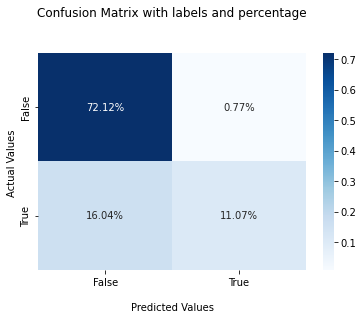

In [ ]:
import seaborn as sns
ax = sns.heatmap(confusion_mat/np.sum(confusion_mat), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix with labels and percentage\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [ ]:
import pickle 
pickle.dump(NB_MN, open('naive96.pkl', 'wb'))